In [131]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [132]:
Dataframe=pd.read_csv('/content/Student_dataset.csv')

In [133]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
Dataframe['Your cumulative average (GPA)'].unique()

array(['80-89 / 3-3.49', '+90 / +3.5', '70-79 / 2.5-299', '60-69 / 2-2.9',
       '60-69 / 2-2.49', 'Below 60 / Below 2.0', '60-69', '80-89', '+90',
       '70-79', 'Below 60'], dtype=object)

In [135]:
import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['Your cumulative average (GPA)'],return_df=True,
                           mapping=[{'col':'Your cumulative average (GPA)',
'mapping':{'Below 60 / Below 2.0':0,'60-69 / 2-2.49':1,'60-69 / 2-2.9':1, '70-79 / 2.5-299':2, '80-89 / 3-3.49':3,'+90 / +3.5':4, '60-69':1, '80-89':3, '+90':4,
       '70-79':2, 'Below 60':0}}])

In [136]:
Dataframe=encoder.fit_transform(Dataframe)

In [137]:
Dataframe['Male']=Dataframe['Gender'].map({'Male':1, 'Female':0})

In [138]:
Dataframe=Dataframe.drop(['Gender'], axis=1)

In [139]:
Dataframe['Level/Year'].unique()

array(['Second/ Sophomore', 'Other', 'First/Freshman', 'Third/Junior',
       'Fourth/Senior', 'Fourth', 'Third', 'First', 'Second'],
      dtype=object)

In [140]:

tikna={'Fourth':'Fourth/Senior', 'Third':'Third/Junior', 'Second':'Second/ Sophomore', 'First':'First/Freshman'}
Dataframe=Dataframe.replace(tikna)

In [141]:
dummy=pd.get_dummies(data=Dataframe['Level/Year'])
Dataframe=pd.concat([Dataframe, dummy], axis=1)
Dataframe=Dataframe.drop(['Level/Year'], axis=1)
Dataframe['Age'].unique()

array(['18-24', '+30', '25-30'], dtype=object)

In [142]:
ageDummy=pd.get_dummies(data=Dataframe['Age'])
Dataframe=pd.concat([Dataframe, ageDummy], axis=1)
Dataframe=Dataframe.drop(['Age'], axis=1)
toolBeforeDummy=pd.get_dummies(data=Dataframe['Before COVID-19: Which of the following digital tools do you usually use?'], prefix='before')

In [143]:
Dataframe=pd.concat([Dataframe, toolBeforeDummy], axis=1)
Dataframe=Dataframe.drop('Before COVID-19: Which of the following digital tools do you usually use?', axis=1)
Dataframe['Before COVID-19: How much time do you spend using the digital tools in learning?'].unique()

array(['6-9', '1-3 ', '3-6', '9-12', '+12', '1-3'], dtype=object)

In [144]:
afterDummy=pd.get_dummies(data=Dataframe['After COVID-19: Which of the following digital tools do you usually use?'], prefix='after')
Dataframe=pd.concat([Dataframe, afterDummy], axis=1)
Dataframe=Dataframe.drop(['After COVID-19: Which of the following digital tools do you usually use?'], axis=1)
Dataframe

,Your cumulative average (GPA),Before COVID-19: How much time do you spend using the digital tools in learning?,After COVID-19: How much time do you spend using the digital tools in learning?,"Before COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","After COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","Before COVID-19: When I use the mobile phone, tablet or laptop in e-learning, I cannot concentrate and I am distracted.","After COVID-19: When I use the mobile phone, tablet or laptop in e-learning, I cannot concentrate and I am distracted.",Before COVID-19: I have fixed hours for bedtime and wake-up.,After COVID-19: I have fixed hours for bedtime and wake-up.,"Before COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.",...,before_Mobile Phone,before_Mobile phone,before_Other,before_Personal Computer,after_I pad/ Tablet,after_Laptop,after_Mobile Phone,after_Mobile phone,after_Other,after_Personal Computer
0,3,6-9,9-12,Uncertain,Agree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,...,0,1,0,0,0,1,0,0,0,0
1,4,1-3,3-6,Agree,Strongly Agree,Disagree,Disagree,Agree,Disagree,Uncertain,...,0,0,0,0,0,1,0,0,0,0
2,4,1-3,3-6,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Disagree,...,0,0,1,0,0,0,0,1,0,0
3,2,6-9,1-3,Uncertain,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree,...,0,0,0,0,0,1,0,0,0,0
4,2,1-3,1-3,Agree,Agree,Disagree,Disagree,Disagree,Disagree,Disagree,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,3,1-3,3-6,Uncertain,Strongly Agree,Agree,Agree,Agree,Agree,Agree,...,1,0,0,0,0,1,0,0,0,0
797,3,1-3,6-9,Strongly Agree,Strongly Agree,Uncertain,Disagree,Disagree,Agree,Agree,...,0,0,0,0,0,1,0,0,0,0
798,0,1-3,1-3,Agree,Agree,Agree,Agree,Disagree,Disagree,Strongly Agree,...,0,0,0,0,0,0,1,0,0,0
799,3,1-3,3-6,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Strongly Disagree,Agree,...,1,0,0,0,0,1,0,0,0,0


In [145]:
Dataframe['Before COVID-19: How much time do you spend using the digital tools in learning?'].unique()

array(['6-9', '1-3 ', '3-6', '9-12', '+12', '1-3'], dtype=object)

In [146]:
Dataframe['The distance learning system, caused by the COVID-19 epidemic, resulted in social distancing.'].unique()

array(['Agree\t', 'Strongly Agree', 'Uncertain\t', 'Strongly Disagree',
       'Disagree', nan, 'Agree', 'Uncertain'], dtype=object)

In [147]:
Dataframe['Before COVID-19: How much time do you spend using the digital tools in learning?'].unique()

array(['6-9', '1-3 ', '3-6', '9-12', '+12', '1-3'], dtype=object)

In [148]:
Dataframe['Prolonged use of e-learning tools often leads to boredom, nervousness, and tension.'].unique()

array(['Agree', 'Disagree', 'Strongly Agree', 'Uncertain', nan,
       'Strongly agree'], dtype=object)

In [149]:
inigma={'Strongly Disagree':0, 'Disagree':1, 'Uncertain\t':2, 'Agree\t':3, 'Strongly Agree':4, 'Agree':3, 'Uncertain':2, 'Strongly agree':4,'Strongly disagree':0 }
fugma={'3-6':1, '6-9':2, '9-12':3, '+12':4, '1-3':0, '1-3 ':0}

In [150]:
Dataframe=Dataframe.replace(inigma)
Dataframe=Dataframe.replace(fugma)
Dataframe=Dataframe.dropna(axis=0)
Dataframe

,Your cumulative average (GPA),Before COVID-19: How much time do you spend using the digital tools in learning?,After COVID-19: How much time do you spend using the digital tools in learning?,"Before COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","After COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","Before COVID-19: When I use the mobile phone, tablet or laptop in e-learning, I cannot concentrate and I am distracted.","After COVID-19: When I use the mobile phone, tablet or laptop in e-learning, I cannot concentrate and I am distracted.",Before COVID-19: I have fixed hours for bedtime and wake-up.,After COVID-19: I have fixed hours for bedtime and wake-up.,"Before COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.",...,before_Mobile Phone,before_Mobile phone,before_Other,before_Personal Computer,after_I pad/ Tablet,after_Laptop,after_Mobile Phone,after_Mobile phone,after_Other,after_Personal Computer
0,3,2,3,2,3,4,4,3,1,3,...,0,1,0,0,0,1,0,0,0,0
1,4,0,1,3,4,1,1,3,1,2,...,0,0,0,0,0,1,0,0,0,0
2,4,0,1,1,4,4,4,4,0,0,...,0,0,1,0,0,0,0,1,0,0
3,2,2,0,2,4,3,4,4,3,4,...,0,0,0,0,0,1,0,0,0,0
4,2,0,0,3,3,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,3,0,1,2,4,3,3,3,3,3,...,1,0,0,0,0,1,0,0,0,0
797,3,0,2,4,4,2,1,1,3,3,...,0,0,0,0,0,1,0,0,0,0
798,0,0,0,3,3,3,3,1,1,4,...,0,0,0,0,0,0,1,0,0,0
799,3,0,1,4,4,3,3,3,0,3,...,1,0,0,0,0,1,0,0,0,0


In [151]:
Dataframe=Dataframe.drop(['after_Laptop', 'Third/Junior'], axis=1)
Dataframe=Dataframe[Dataframe['Your cumulative average (GPA)']>0]
Dataframe

,Your cumulative average (GPA),Before COVID-19: How much time do you spend using the digital tools in learning?,After COVID-19: How much time do you spend using the digital tools in learning?,"Before COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","After COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","Before COVID-19: When I use the mobile phone, tablet or laptop in e-learning, I cannot concentrate and I am distracted.","After COVID-19: When I use the mobile phone, tablet or laptop in e-learning, I cannot concentrate and I am distracted.",Before COVID-19: I have fixed hours for bedtime and wake-up.,After COVID-19: I have fixed hours for bedtime and wake-up.,"Before COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.",...,before_Laptop,before_Mobile Phone,before_Mobile phone,before_Other,before_Personal Computer,after_I pad/ Tablet,after_Mobile Phone,after_Mobile phone,after_Other,after_Personal Computer
0,3,2,3,2,3,4,4,3,1,3,...,0,0,1,0,0,0,0,0,0,0
1,4,0,1,3,4,1,1,3,1,2,...,1,0,0,0,0,0,0,0,0,0
2,4,0,1,1,4,4,4,4,0,0,...,0,0,0,1,0,0,0,1,0,0
3,2,2,0,2,4,3,4,4,3,4,...,1,0,0,0,0,0,0,0,0,0
4,2,0,0,3,3,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3,0,1,3,4,1,3,3,1,2,...,0,1,0,0,0,0,1,0,0,0
796,3,0,1,2,4,3,3,3,3,3,...,0,1,0,0,0,0,0,0,0,0
797,3,0,2,4,4,2,1,1,3,3,...,1,0,0,0,0,0,0,0,0,0
799,3,0,1,4,4,3,3,3,0,3,...,0,1,0,0,0,0,0,0,0,0


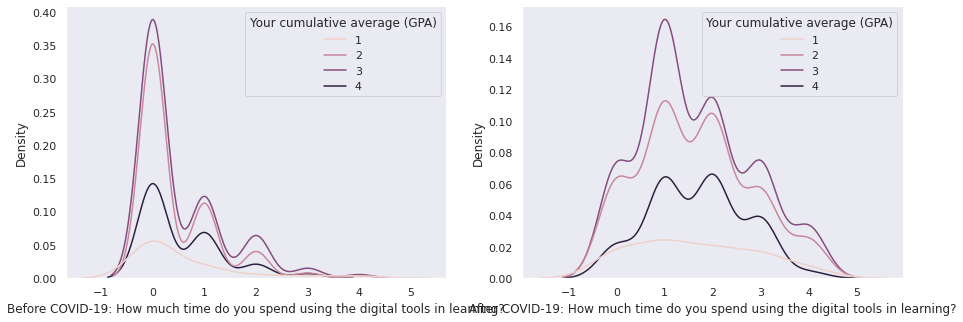

In [153]:
fig = plt.figure(figsize=[15,5])
plt.tight_layout()
for i in range(2):
    fig.add_subplot(1,  2, i+1)

    sns.kdeplot(data = Dataframe,x= Dataframe.columns[i+1], hue='Your cumulative average (GPA)')
    if i == 16:
        plt.xlim([-50,400])
sns.despine()

In [154]:
targetDummy=pd.get_dummies(data=Dataframe['Your cumulative average (GPA)'])
Dataframe=pd.concat([Dataframe, targetDummy], axis=1)
Dataframe=Dataframe.drop(['Your cumulative average (GPA)'], axis=1)

In [155]:
from imblearn.over_sampling import SMOTE

In [156]:
X=Dataframe.iloc[:, 1:]
y=Dataframe.iloc[:, :1]

In [157]:
oversample = SMOTE()
X_resample, y_resample = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [158]:
y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)

In [159]:
y_resample

,Before COVID-19: How much time do you spend using the digital tools in learning?
0,2
1,0
2,0
3,2
4,0
...,...
2545,4
2546,4
2547,4
2548,4


In [160]:
targetDummies = pd.get_dummies( data = y_resample, dummy_na=True)

In [161]:
y_resample=pd.concat([y_resample, targetDummies], axis=1)

In [162]:
y_resample=y_resample.iloc[:,1:]

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.33, random_state=42, shuffle=True)

In [164]:
y_train

,Before COVID-19: How much time do you spend using the digital tools in learning?
591,0
462,1
1036,1
45,0
1268,2
...,...
1638,3
1095,1
1130,2
1294,2


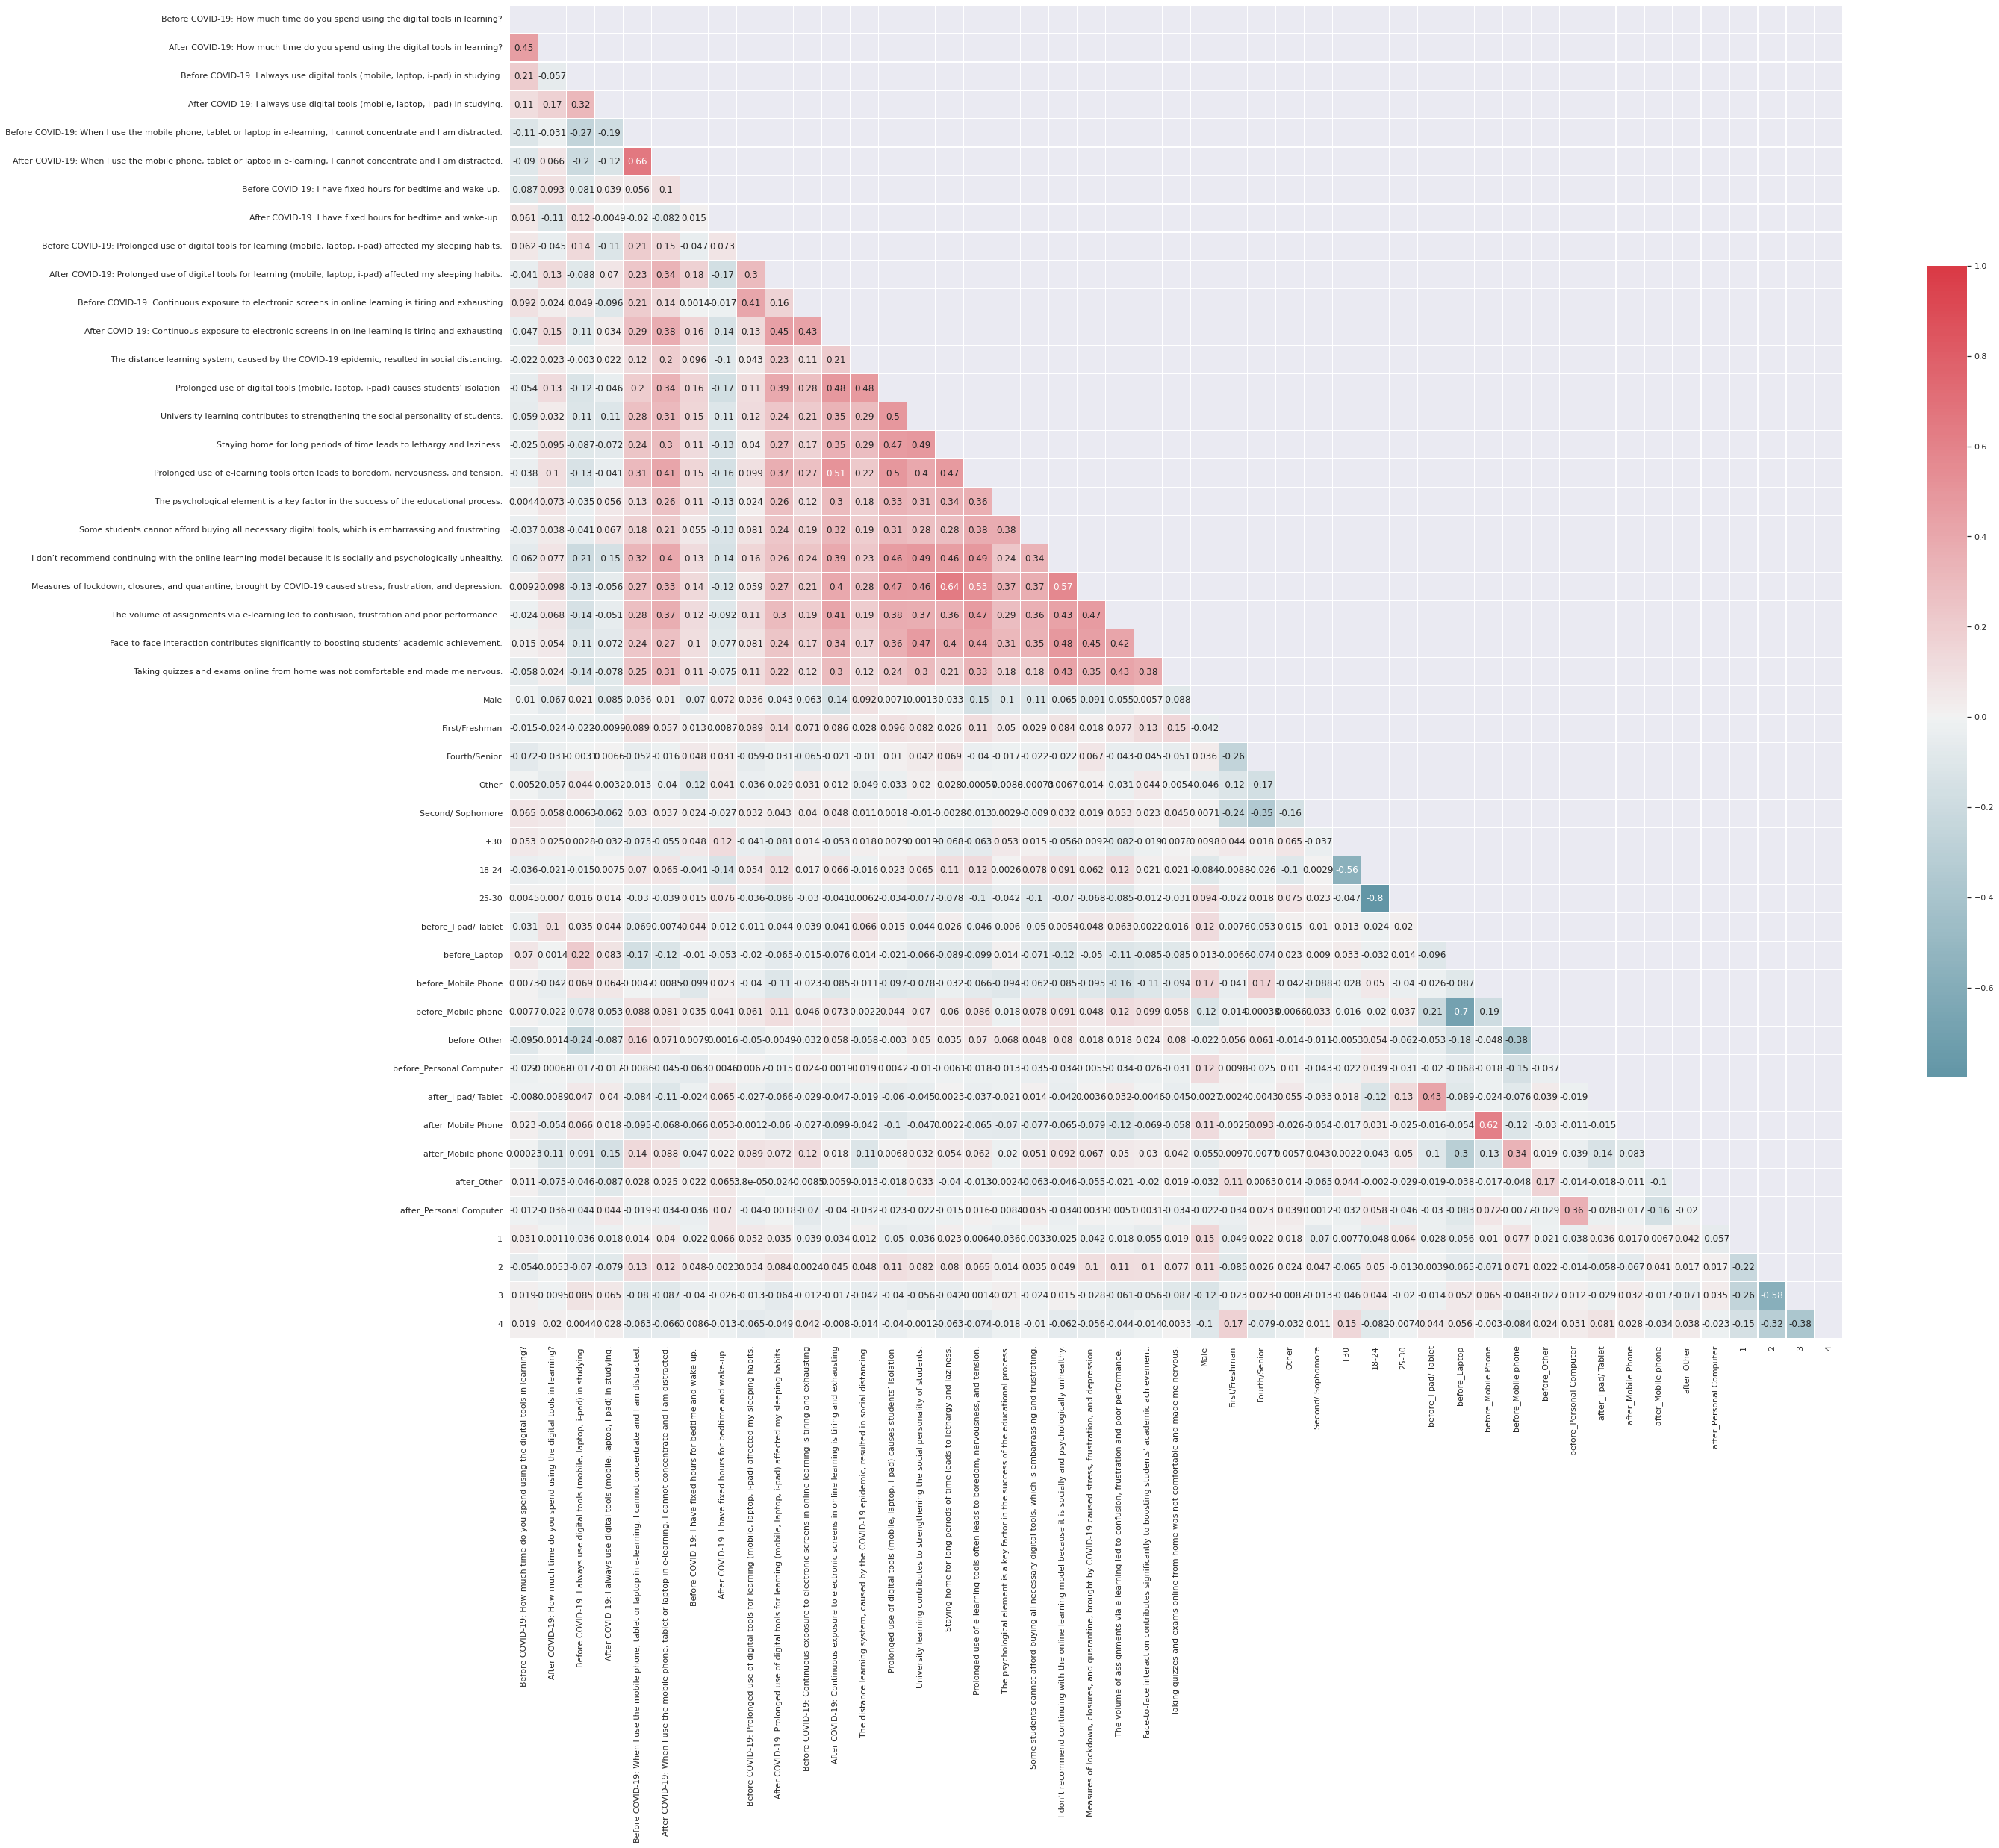

In [165]:
sns.set(style="dark")
corr = Dataframe.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(40,40))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5}, annot=True)

In [166]:
Dataframe

,Before COVID-19: How much time do you spend using the digital tools in learning?,After COVID-19: How much time do you spend using the digital tools in learning?,"Before COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","After COVID-19: I always use digital tools (mobile, laptop, i-pad) in studying.","Before COVID-19: When I use the mobile phone, tablet or laptop in e-learning, I cannot concentrate and I am distracted.","After COVID-19: When I use the mobile phone, tablet or laptop in e-learning, I cannot concentrate and I am distracted.",Before COVID-19: I have fixed hours for bedtime and wake-up.,After COVID-19: I have fixed hours for bedtime and wake-up.,"Before COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.","After COVID-19: Prolonged use of digital tools for learning (mobile, laptop, i-pad) affected my sleeping habits.",...,before_Personal Computer,after_I pad/ Tablet,after_Mobile Phone,after_Mobile phone,after_Other,after_Personal Computer,1,2,3,4
0,2,3,2,3,4,4,3,1,3,3,...,0,0,0,0,0,0,0,0,1,0
1,0,1,3,4,1,1,3,1,2,3,...,0,0,0,0,0,0,0,0,0,1
2,0,1,1,4,4,4,4,0,0,4,...,0,0,0,1,0,0,0,0,0,1
3,2,0,2,4,3,4,4,3,4,4,...,0,0,0,0,0,0,0,1,0,0
4,0,0,3,3,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,3,4,1,3,3,1,2,4,...,0,0,1,0,0,0,0,0,1,0
796,0,1,2,4,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,1,0
797,0,2,4,4,2,1,1,3,3,4,...,0,0,0,0,0,0,0,0,1,0
799,0,1,4,4,3,3,3,0,3,4,...,0,0,0,0,0,0,0,0,1,0


In [167]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [168]:
import tensorflow as tf

In [169]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.utils import np_utils, generic_utils

In [171]:
# Initializing the ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
ann.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 500)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


54/54 [==============================] - 0s 2ms/step - loss: 1.7300 - accuracy: 0.1575
Epoch 2/500
54/54 [==============================] - 0s 2ms/step - loss: 1.5600 - accuracy: 0.2635
Epoch 3/500
54/54 [==============================] - 0s 2ms/step - loss: 1.4853 - accuracy: 0.3115
Epoch 4/500
54/54 [==============================] - 0s 2ms/step - loss: 1.4097 - accuracy: 0.3800
Epoch 5/500
54/54 [==============================] - 0s 2ms/step - loss: 1.3358 - accuracy: 0.4081
Epoch 6/500
54/54 [==============================] - 0s 2ms/step - loss: 1.2591 - accuracy: 0.4502
Epoch 7/500
54/54 [==============================] - 0s 2ms/step - loss: 1.1794 - accuracy: 0.4854
Epoch 8/500
54/54 [==============================] - 0s 2ms/step - loss: 1.1005 - accuracy: 0.5211
Epoch 9/500
54/54 [==============================] - 0s 2ms/step - loss: 1.0562 - accuracy: 0.5439
Epoch 10/500
54/54 [==============================] - 0s 2ms/step - loss: 1.0175 - accuracy: 0.5544
Epoch 11/500
54/54 [=

In [173]:
y_pred=ann.predict(X_test)

In [174]:
from sklearn.metrics import accuracy_score
y_pred = np.argmax(y_pred, axis=1)
accuracy_score(y_test, y_pred)

0.7921615201900237